In [70]:
import os
import matplotlib.pyplot as plt
import ast
import pandas as pd
import time
import numpy as np
import json

In [90]:
with open('SciNews/dataset/human_news_articles.json', 'r') as f:
    hdata = json.load(f)
with open('SciNews/dataset/llm_generated_data.json', 'r') as f:
    ldata = json.load(f)

In [91]:
# hdata

In [92]:
# ldata

In [93]:
len(hdata)

1200

In [94]:
len(hdata[1]['text'])

5235

In [95]:
text_lens = [len(x['text']) for x in hdata]

In [96]:
print(f"Maximum length of news article: {max(text_lens)}")

Maximum length of news article: 32880


In [97]:
import re
ends = r'[.!?]'
no_of_sentences = [len(re.split(ends, x['text'])) for x in hdata]
no_of_sentences

[51,
 76,
 27,
 43,
 95,
 33,
 45,
 39,
 62,
 101,
 85,
 51,
 48,
 27,
 104,
 30,
 72,
 30,
 19,
 7,
 86,
 30,
 19,
 100,
 56,
 91,
 102,
 33,
 42,
 28,
 29,
 41,
 23,
 19,
 59,
 54,
 45,
 34,
 8,
 48,
 44,
 48,
 31,
 26,
 39,
 31,
 55,
 9,
 19,
 41,
 20,
 44,
 56,
 62,
 19,
 11,
 62,
 73,
 61,
 79,
 58,
 127,
 44,
 33,
 85,
 56,
 50,
 56,
 56,
 23,
 78,
 28,
 56,
 45,
 450,
 53,
 43,
 108,
 55,
 32,
 36,
 17,
 27,
 33,
 29,
 21,
 34,
 19,
 26,
 34,
 15,
 46,
 40,
 32,
 23,
 34,
 57,
 29,
 22,
 32,
 86,
 164,
 40,
 55,
 12,
 29,
 59,
 28,
 46,
 30,
 73,
 26,
 35,
 67,
 96,
 30,
 54,
 10,
 26,
 22,
 29,
 45,
 88,
 16,
 125,
 60,
 35,
 36,
 33,
 38,
 78,
 58,
 81,
 41,
 47,
 17,
 71,
 5,
 42,
 15,
 21,
 30,
 14,
 28,
 12,
 43,
 19,
 99,
 32,
 29,
 47,
 29,
 10,
 235,
 40,
 53,
 30,
 25,
 40,
 21,
 41,
 137,
 60,
 47,
 55,
 16,
 46,
 20,
 27,
 68,
 202,
 19,
 59,
 29,
 19,
 272,
 56,
 76,
 62,
 66,
 32,
 80,
 35,
 30,
 30,
 62,
 61,
 57,
 26,
 3,
 20,
 54,
 37,
 50,
 45,
 53,
 38,
 40,
 1

In [98]:
print(f"Maximum number of sentences within the news articles: {max(no_of_sentences)}")

Maximum number of sentences within the news articles: 557


In [99]:
print(f"Minimum number of sentences within the news articles: {min(no_of_sentences)}")

Minimum number of sentences within the news articles: 1


In [100]:
print(f"Average number of sentences within the news articles: {round(np.mean(no_of_sentences),2)}")

Average number of sentences within the news articles: 54.49


In [101]:
np.sqrt(len(no_of_sentences))

34.64101615137755

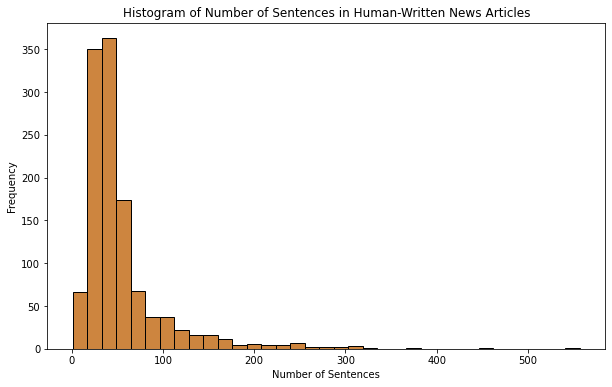

In [102]:
plt.figure(figsize=(10,6))
plt.hist(no_of_sentences, bins=35, edgecolor = 'black', color='peru')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Sentences in Human-Written News Articles')
# plt.grid(True)
plt.savefig('human_noofsentences.png')
plt.show()

In [103]:
def calc_avg_no_of_words_per_sent(x):
    ends = r'[.!?]'
    sen = re.split(ends, x)
    sen_lens = [len(i.split()) for i in sen]
    no_sen = len(sen)
    return round((sum(sen_lens)/no_sen), 2)

In [104]:
vals = [calc_avg_no_of_words_per_sent(x['text']) for x in hdata]

In [105]:
vals

[14.69,
 10.11,
 17.85,
 8.33,
 8.89,
 18.7,
 13.27,
 15.62,
 18.56,
 9.19,
 9.4,
 18.67,
 21.19,
 13.89,
 15.31,
 15.53,
 6.04,
 6.57,
 22.89,
 26.29,
 13.13,
 18.67,
 14.95,
 9.98,
 13.68,
 15.76,
 11.34,
 12.18,
 17.86,
 18.79,
 15.52,
 12.9,
 17.87,
 10.79,
 9.92,
 14.83,
 14.22,
 21.94,
 6.62,
 12.6,
 15.5,
 21.92,
 17.06,
 20.31,
 20.21,
 23.87,
 19.09,
 39.67,
 23.74,
 17.95,
 19.65,
 20.73,
 15.95,
 12.79,
 22.21,
 21.64,
 9.73,
 10.05,
 14.51,
 18.56,
 9.41,
 9.6,
 13.89,
 22.33,
 10.48,
 14.02,
 15.58,
 13.57,
 16.68,
 17.26,
 11.85,
 18.79,
 20.3,
 15.69,
 10.73,
 22.94,
 20.05,
 19.23,
 23.56,
 22.66,
 23.78,
 19.24,
 18.0,
 20.82,
 25.21,
 21.33,
 24.62,
 11.32,
 19.42,
 14.59,
 18.6,
 19.35,
 21.57,
 29.66,
 20.61,
 16.41,
 11.3,
 18.52,
 22.73,
 17.25,
 19.71,
 18.32,
 19.8,
 14.24,
 29.08,
 24.79,
 19.71,
 21.04,
 20.41,
 18.8,
 21.07,
 16.04,
 18.83,
 17.15,
 18.15,
 18.43,
 15.46,
 12.8,
 14.62,
 19.82,
 21.59,
 18.49,
 21.52,
 18.25,
 10.01,
 12.97,
 28.46,
 17.97,
 

In [106]:
print(f"Average number of words per sentence within all the news articles: {round(np.mean(vals),2)}")

Average number of words per sentence within all the news articles: 19.39


In [107]:
np.sqrt(len(vals))

34.64101615137755

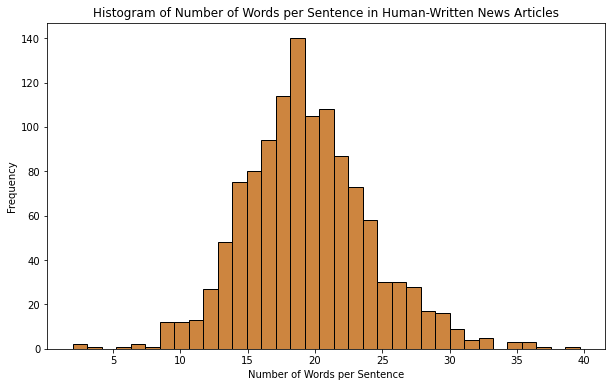

In [108]:
plt.figure(figsize=(10,6))
plt.hist(vals, bins=35, edgecolor = 'black', color='peru')
plt.xlabel('Number of Words per Sentence')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words per Sentence in Human-Written News Articles')
# plt.grid(True)
plt.savefig('human_noofwordspersentence.png')
plt.show()

In [109]:
import re
ends = r'[.!?]'
no_of_sentences = [len(re.split(ends, x['text'])) for x in ldata]
no_of_sentences

[8,
 19,
 8,
 5,
 4,
 7,
 6,
 7,
 7,
 9,
 5,
 7,
 6,
 6,
 9,
 11,
 8,
 7,
 9,
 11,
 6,
 10,
 7,
 6,
 10,
 12,
 8,
 6,
 5,
 4,
 11,
 5,
 6,
 5,
 5,
 9,
 5,
 8,
 6,
 11,
 5,
 6,
 7,
 8,
 5,
 7,
 7,
 7,
 12,
 6,
 6,
 10,
 6,
 6,
 8,
 10,
 4,
 7,
 7,
 7,
 6,
 7,
 5,
 7,
 8,
 8,
 8,
 6,
 7,
 8,
 7,
 5,
 5,
 10,
 7,
 8,
 5,
 9,
 8,
 7,
 6,
 8,
 5,
 10,
 7,
 6,
 7,
 8,
 7,
 5,
 6,
 9,
 8,
 10,
 8,
 4,
 5,
 10,
 9,
 7,
 7,
 8,
 5,
 8,
 5,
 6,
 5,
 6,
 6,
 8,
 9,
 10,
 7,
 5,
 9,
 7,
 8,
 6,
 10,
 17,
 15,
 5,
 6,
 12,
 5,
 9,
 6,
 15,
 6,
 6,
 8,
 6,
 10,
 4,
 5,
 6,
 7,
 6,
 7,
 7,
 9,
 9,
 8,
 7,
 7,
 5,
 6,
 6,
 12,
 10,
 5,
 10,
 9,
 8,
 5,
 5,
 5,
 6,
 16,
 7,
 6,
 12,
 8,
 8,
 5,
 8,
 8,
 8,
 8,
 8,
 5,
 10,
 4,
 9,
 7,
 5,
 6,
 9,
 4,
 6,
 14,
 5,
 4,
 6,
 13,
 6,
 9,
 9,
 9,
 11,
 9,
 5,
 9,
 7,
 11,
 10,
 5,
 13,
 10,
 5,
 8,
 7,
 8,
 5,
 9,
 6,
 6,
 5,
 6,
 8,
 6,
 10,
 6,
 12,
 6,
 8,
 4,
 5,
 7,
 7,
 4,
 10,
 4,
 7,
 6,
 10,
 5,
 8,
 8,
 6,
 8,
 8,
 13,
 4,
 5,
 5,
 6,
 10,
 9,
 9,

In [110]:
print(f"Maximum number of sentences within the news articles: {max(no_of_sentences)}")

Maximum number of sentences within the news articles: 35


In [111]:
print(f"Minimum number of sentences within the news articles: {min(no_of_sentences)}")

Minimum number of sentences within the news articles: 1


In [112]:
print(f"Average number of sentences within the news articles: {round(np.mean(no_of_sentences),2)}")

Average number of sentences within the news articles: 8.24


In [113]:
np.sqrt(len(no_of_sentences))

34.64101615137755

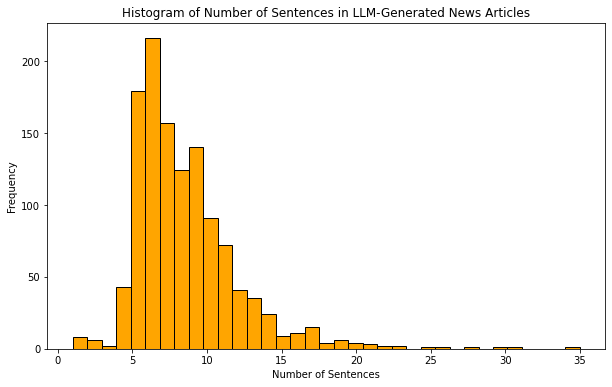

In [114]:
plt.figure(figsize=(10,6))
plt.hist(no_of_sentences, bins=35, edgecolor = 'black', color='orange')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Sentences in LLM-Generated News Articles')
# plt.grid(True)
plt.savefig('llm_noofsentences.png')
plt.show()

In [115]:
def calc_avg_no_of_words_per_sent(x):
    ends = r'[.!?]'
    sen = re.split(ends, x)
    sen_lens = [len(i.split()) for i in sen]
    no_sen = len(sen)
    return round((sum(sen_lens)/no_sen), 2)

In [116]:
vals = [calc_avg_no_of_words_per_sent(x['text']) for x in ldata]

In [117]:
vals

[16.38,
 10.79,
 26.12,
 23.4,
 31.25,
 26.14,
 23.0,
 22.86,
 19.86,
 21.11,
 23.2,
 18.43,
 23.33,
 26.67,
 23.67,
 24.45,
 27.75,
 19.14,
 22.11,
 23.18,
 22.0,
 13.5,
 23.57,
 29.17,
 25.6,
 17.75,
 25.88,
 19.67,
 22.4,
 32.25,
 22.82,
 24.2,
 30.17,
 20.2,
 23.8,
 24.33,
 22.8,
 18.88,
 20.5,
 12.91,
 26.8,
 24.83,
 21.43,
 16.12,
 20.2,
 28.57,
 14.71,
 21.57,
 24.08,
 26.17,
 21.0,
 24.7,
 21.83,
 25.5,
 21.62,
 23.4,
 15.75,
 24.86,
 23.14,
 20.0,
 26.0,
 30.29,
 26.0,
 22.71,
 23.0,
 14.25,
 22.5,
 23.5,
 28.14,
 26.38,
 20.43,
 25.0,
 18.6,
 21.8,
 25.71,
 24.38,
 24.4,
 22.33,
 24.75,
 18.86,
 25.17,
 22.12,
 28.6,
 25.6,
 29.29,
 19.17,
 26.71,
 31.62,
 20.14,
 24.0,
 22.17,
 22.44,
 21.38,
 21.9,
 23.75,
 34.75,
 22.0,
 25.5,
 23.89,
 23.86,
 28.14,
 22.5,
 26.0,
 16.88,
 26.4,
 23.67,
 27.2,
 27.0,
 19.83,
 26.38,
 23.11,
 14.7,
 21.43,
 23.4,
 25.11,
 25.14,
 22.5,
 22.17,
 20.6,
 14.82,
 12.87,
 19.4,
 25.83,
 16.17,
 19.6,
 27.0,
 25.0,
 13.13,
 23.0,
 22.67,
 20.62,


In [118]:
print(f"Average number of words per sentence within all the news articles: {round(np.mean(vals),2)}")

Average number of words per sentence within all the news articles: 21.88


In [119]:
np.sqrt(len(vals))

34.64101615137755

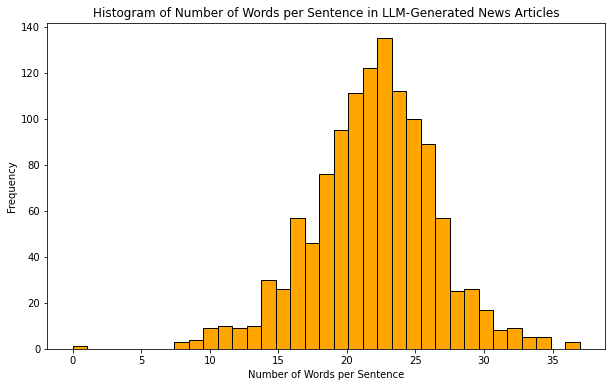

In [120]:
plt.figure(figsize=(10,6))
plt.hist(vals, bins=35, edgecolor = 'black', color='orange')
plt.xlabel('Number of Words per Sentence')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words per Sentence in LLM-Generated News Articles')
# plt.grid(True)
plt.savefig('llm_noofwordspersentence.png')
plt.show()

In [68]:
from transformers import (AutoModelForTokenClassification, 
                          AutoTokenizer, 
                          pipeline,
                          )

model_checkpoint = "jsylee/scibert_scivocab_uncased-finetuned-ner"
model = AutoModelForTokenClassification.from_pretrained(model_checkpoint, num_labels=5,
                                            id2label={0: 'O', 1: 'B-DRUG', 2: 'I-DRUG', 3: 'B-EFFECT', 4: 'I-EFFECT'} 
                                            )                                                        
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

model_pipeline = pipeline(task="ner", model=model, tokenizer=tokenizer)

print( model_pipeline ("Abortion, miscarriage or uterine hemorrhage associated with misoprostol (Cytotec), a labor-inducing drug."))

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity': 'B-EFFECT', 'score': 0.9896298, 'index': 1, 'word': 'abortion', 'start': 0, 'end': 8}, {'entity': 'B-EFFECT', 'score': 0.9958769, 'index': 3, 'word': 'misc', 'start': 10, 'end': 14}, {'entity': 'I-EFFECT', 'score': 0.9981452, 'index': 4, 'word': '##arri', 'start': 14, 'end': 18}, {'entity': 'I-EFFECT', 'score': 0.99885833, 'index': 5, 'word': '##age', 'start': 18, 'end': 21}, {'entity': 'B-EFFECT', 'score': 0.99486417, 'index': 7, 'word': 'uterine', 'start': 25, 'end': 32}, {'entity': 'I-EFFECT', 'score': 0.9983771, 'index': 8, 'word': 'hemorrhage', 'start': 33, 'end': 43}, {'entity': 'B-DRUG', 'score': 0.99906176, 'index': 11, 'word': 'mis', 'start': 60, 'end': 63}, {'entity': 'I-DRUG', 'score': 0.9979778, 'index': 12, 'word': '##oprost', 'start': 63, 'end': 69}, {'entity': 'I-DRUG', 'score': 0.9995092, 'index': 13, 'word': '##ol', 'start': 69, 'end': 71}, {'entity': 'B-DRUG', 'score': 0.9684281, 'index': 15, 'word': 'cyto', 'start': 73, 'end': 77}, {'entity': 'I-DRUG', 's